<a href="https://colab.research.google.com/github/SankethHanasi/BIS_LAB/blob/main/Partical_Swarm_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 1/100, Best Value: 7.231641322995689
Iteration 2/100, Best Value: 4.534860336093709
Iteration 3/100, Best Value: 4.534860336093709
Iteration 4/100, Best Value: 3.045759856123965
Iteration 5/100, Best Value: 3.045759856123965
Iteration 6/100, Best Value: 2.3615342604558265
Iteration 7/100, Best Value: 1.417842884023024
Iteration 8/100, Best Value: 1.417842884023024
Iteration 9/100, Best Value: 1.417842884023024
Iteration 10/100, Best Value: 1.1850727223756792
Iteration 11/100, Best Value: 1.0684027807755498
Iteration 12/100, Best Value: 1.0684027807755498
Iteration 13/100, Best Value: 1.0684027807755498
Iteration 14/100, Best Value: 1.0684027807755498
Iteration 15/100, Best Value: 1.0031681358740414
Iteration 16/100, Best Value: 1.0031681358740414
Iteration 17/100, Best Value: 1.0031681358740414
Iteration 18/100, Best Value: 0.9967213436197895
Iteration 19/100, Best Value: 0.9967213436197895
Iteration 20/100, Best Value: 0.9964910487250833
Iteration 21/100, Best Value: 0.99649

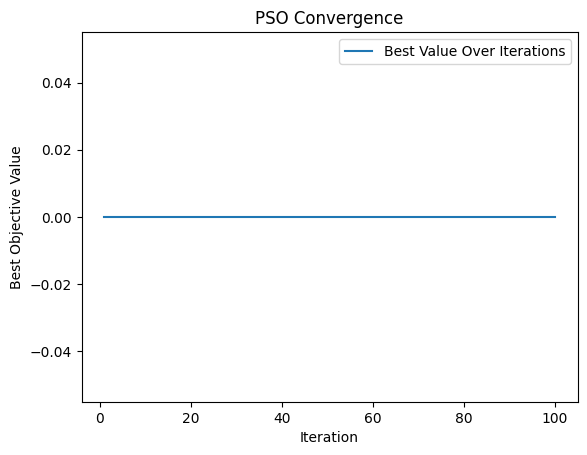

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rastrigin Function (Objective Function)
def rastrigin(x):
    return 10 * len(x) + sum(xi**2 - 10 * np.cos(2 * np.pi * xi) for xi in x)

# PSO Algorithm
class PSO:
    def __init__(self, objective_function, n_particles, n_dimensions, max_iter, bounds):
        self.objective_function = objective_function  # The objective function to minimize
        self.n_particles = n_particles  # Number of particles in the swarm
        self.n_dimensions = n_dimensions  # Number of dimensions (features)
        self.max_iter = max_iter  # Maximum number of iterations
        self.bounds = bounds  # Bounds for the search space (min, max)

        # Initialize the swarm's positions and velocities
        self.positions = np.random.uniform(bounds[0], bounds[1], (n_particles, n_dimensions))
        self.velocities = np.random.uniform(-1, 1, (n_particles, n_dimensions))

        # Initialize personal best positions and values
        self.pbest_positions = np.copy(self.positions)
        self.pbest_values = np.apply_along_axis(self.objective_function, 1, self.positions)

        # Initialize global best position and value
        self.gbest_position = self.pbest_positions[np.argmin(self.pbest_values)]
        self.gbest_value = np.min(self.pbest_values)

        # PSO parameters (hyperparameters)
        self.w = 0.5  # Inertia weight
        self.c1 = 1.5  # Cognitive coefficient
        self.c2 = 1.5  # Social coefficient

    def update_velocity(self, i):
        # Update velocity for particle i
        r1, r2 = np.random.rand(2)  # Random numbers for the update rule
        inertia = self.w * self.velocities[i]
        cognitive = self.c1 * r1 * (self.pbest_positions[i] - self.positions[i])
        social = self.c2 * r2 * (self.gbest_position - self.positions[i])
        self.velocities[i] = inertia + cognitive + social

    def update_position(self, i):
        # Update position for particle i
        self.positions[i] += self.velocities[i]

        # Ensure particles are within bounds
        self.positions[i] = np.clip(self.positions[i], self.bounds[0], self.bounds[1])

    def optimize(self):
        # Perform optimization over a number of iterations
        for t in range(self.max_iter):
            for i in range(self.n_particles):
                # Update particle velocity and position
                self.update_velocity(i)
                self.update_position(i)

                # Evaluate fitness (objective function value)
                fitness = self.objective_function(self.positions[i])

                # Update personal best if necessary
                if fitness < self.pbest_values[i]:
                    self.pbest_values[i] = fitness
                    self.pbest_positions[i] = self.positions[i]

            # Update global best if necessary
            min_pbest_value = np.min(self.pbest_values)
            if min_pbest_value < self.gbest_value:
                self.gbest_value = min_pbest_value
                self.gbest_position = self.pbest_positions[np.argmin(self.pbest_values)]

            # Print the best result at each iteration (optional)
            print(f"Iteration {t+1}/{self.max_iter}, Best Value: {self.gbest_value}")

        return self.gbest_position, self.gbest_value


# Set parameters
n_particles = 30  # Number of particles in the swarm
n_dimensions = 2  # Number of dimensions (for Rastrigin, 2D)
max_iter = 100  # Maximum number of iterations
bounds = (-5.12, 5.12)  # Bounds for Rastrigin function

# Initialize and run PSO
pso = PSO(objective_function=rastrigin,
          n_particles=n_particles,
          n_dimensions=n_dimensions,
          max_iter=max_iter,
          bounds=bounds)

best_position, best_value = pso.optimize()
print("\nOptimal solution:", best_position)
print("Objective function value at optimal solution:", best_value)

# Plot the convergence of the objective function
iterations = np.arange(1, max_iter + 1)
best_values = [pso.gbest_value for _ in range(max_iter)]  # For illustration, same best value per iteration

plt.plot(iterations, best_values, label='Best Value Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Best Objective Value')
plt.title('PSO Convergence')
plt.legend()
plt.show()


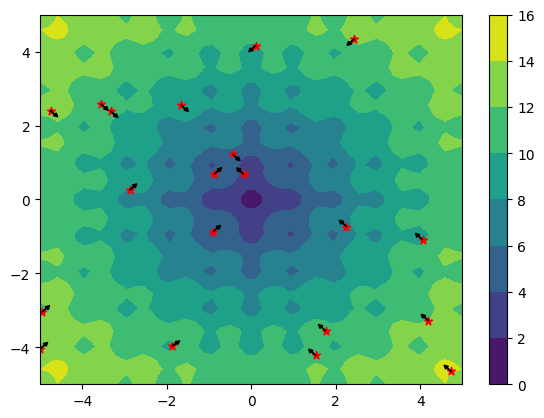

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

DIMENSIONS = 2              # Number of dimensions
GLOBAL_BEST = 0             # Global Best of Cost function
B_LO = -5                   # Upper boundary of search space
B_HI = 5                    # Upper boundary of search space

POPULATION = 20             # Number of particles in the swarm
V_MAX = 0.1                 # Maximum velocity value
PERSONAL_C = 2.0            # Personal coefficient factor
SOCIAL_C = 2.0              # Social coefficient factor
CONVERGENCE = 0.001         # Convergence value
MAX_ITER = 100              # Maximum number of iterrations

# Particle class
class Particle():
    def __init__(self, x, y, z, velocity):
        self.pos = [x, y]
        self.pos_z = z
        self.velocity = velocity
        self.best_pos = self.pos.copy()

class Swarm():
    def __init__(self, pop, v_max):
        self.particles = []             # List of particles in the swarm
        self.best_pos = None            # Best particle of the swarm
        self.best_pos_z = math.inf      # Best particle of the swarm

        for _ in range(pop):
            x = np.random.uniform(B_LO, B_HI)
            y = np.random.uniform(B_LO, B_HI)
            z = cost_function(x, y)
            velocity = np.random.rand(2) * v_max
            particle = Particle(x, y, z, velocity)
            self.particles.append(particle)
            if self.best_pos != None and particle.pos_z < self.best_pos_z:
                self.best_pos = particle.pos.copy()
                self.best_pos_z = particle.pos_z
            else:
                self.best_pos = particle.pos.copy()
                self.best_pos_z = particle.pos_z

# Evaluate objective/cost function (Ackley)
def cost_function(x, y, a=20, b=0.2, c=2*math.pi):
    term_1 = np.exp((-b * np.sqrt(0.5 * (x ** 2 + y ** 2))))
    term_2 = np.exp((np.cos(c * x) + np.cos(c * y)) / 2)
    return -1 * a * term_1 - term_2 + a + np.exp(1)

def particle_swarm_optimization():

    # Initialize plotting variables
    x = np.linspace(B_LO, B_HI, 50)
    y = np.linspace(B_LO, B_HI, 50)
    X, Y = np.meshgrid(x, y)
    fig = plt.figure("Particle Swarm Optimization")

    # Initialize swarm
    swarm = Swarm(POPULATION, V_MAX)

    # Initialize inertia weight
    inertia_weight = 0.5 + (np.random.rand()/2)

    curr_iter = 0
    while curr_iter < MAX_ITER:

        fig.clf()
        ax = fig.add_subplot(1, 1, 1)
        ac = ax.contourf(X, Y, cost_function(X, Y), cmap='viridis')
        fig.colorbar(ac)

        for particle in swarm.particles:

            for i in range(0, DIMENSIONS):
                r1 = np.random.uniform(0, 1)
                r2 = np.random.uniform(0, 1)

                # Update particle's velocity
                personal_coefficient = PERSONAL_C * r1 * (particle.best_pos[i] - particle.pos[i])
                social_coefficient = SOCIAL_C * r2 * (swarm.best_pos[i] - particle.pos[i])
                new_velocity = inertia_weight * particle.velocity[i] + personal_coefficient + social_coefficient

                # Check if velocity is exceeded
                if new_velocity > V_MAX:
                    particle.velocity[i] = V_MAX
                elif new_velocity < -V_MAX:
                    particle.velocity[i] = -V_MAX
                else:
                    particle.velocity[i] = new_velocity

            ax.scatter(particle.pos[0], particle.pos[1], marker='*', c='r')
            ax.arrow(particle.pos[0], particle.pos[1], particle.velocity[0], particle.velocity[1], head_width=0.1, head_length=0.1, color='k')

            # Update particle's current position
            particle.pos += particle.velocity
            particle.pos_z = cost_function(particle.pos[0], particle.pos[1])

            # Update particle's best known position
            if particle.pos_z < cost_function(particle.best_pos[0], particle.best_pos[1]):
                particle.best_pos = particle.pos.copy()

                # Update swarm's best known position
                if particle.pos_z < swarm.best_pos_z:
                    swarm.best_pos = particle.pos.copy()
                    swarm.best_pos_z = particle.pos_z

            # Check if particle is within boundaries
            if particle.pos[0] > B_HI:
                particle.pos[0] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[1] > B_HI:
                particle.pos[1] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[0] < B_LO:
                particle.pos[0] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])
            if particle.pos[1] < B_LO:
                particle.pos[1] = np.random.uniform(B_LO, B_HI)
                particle.pos_z = cost_function(particle.pos[0], particle.pos[1])

        plt.subplots_adjust(right = 0.95)
        plt.pause(0.00001)

        # Check for convergence
        if abs(swarm.best_pos_z - GLOBAL_BEST) < CONVERGENCE:
            print("The swarm has met convergence criteria after " + str(curr_iter) + " iterrations.")
            break
        curr_iter += 1
    plt.show()

if __name__ == "__main__":
    particle_swarm_optimization()